# Using pickle library

In [43]:
import pickle

## using the `request` library to download the files 

In [5]:
import requests
import pandas as pd

public_urls = [
    'https://kaggle-classification-academic-success-dataset.s3.amazonaws.com/playground-series-s4e6/sample_submission.csv',
    'https://kaggle-classification-academic-success-dataset.s3.amazonaws.com/playground-series-s4e6/test.csv',
    'https://kaggle-classification-academic-success-dataset.s3.amazonaws.com/playground-series-s4e6/train.csv'
]

dataframes = {}  # Dictionary to store DataFrames 

for url in public_urls:
    response = requests.get(url)
    local_filename = url.split('/')[-1]
    
    with open(local_filename, 'wb') as f:
        f.write(response.content)

#  use the pandas library to read the data from the CSV file into a DataFrame  
    if (local_filename == "train.csv"):
        df = pd.read_csv(local_filename)
    elif (local_filename == "test.csv"):
        df_test = pd.read_csv(local_filename)
    elif (local_filename == "sample_submission.csv"):
        df_sample_submission = pd.read_csv(local_filename)

# Check missing value

In [6]:
print(df.isnull().sum())
a = 12


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

## Correlation Matrix

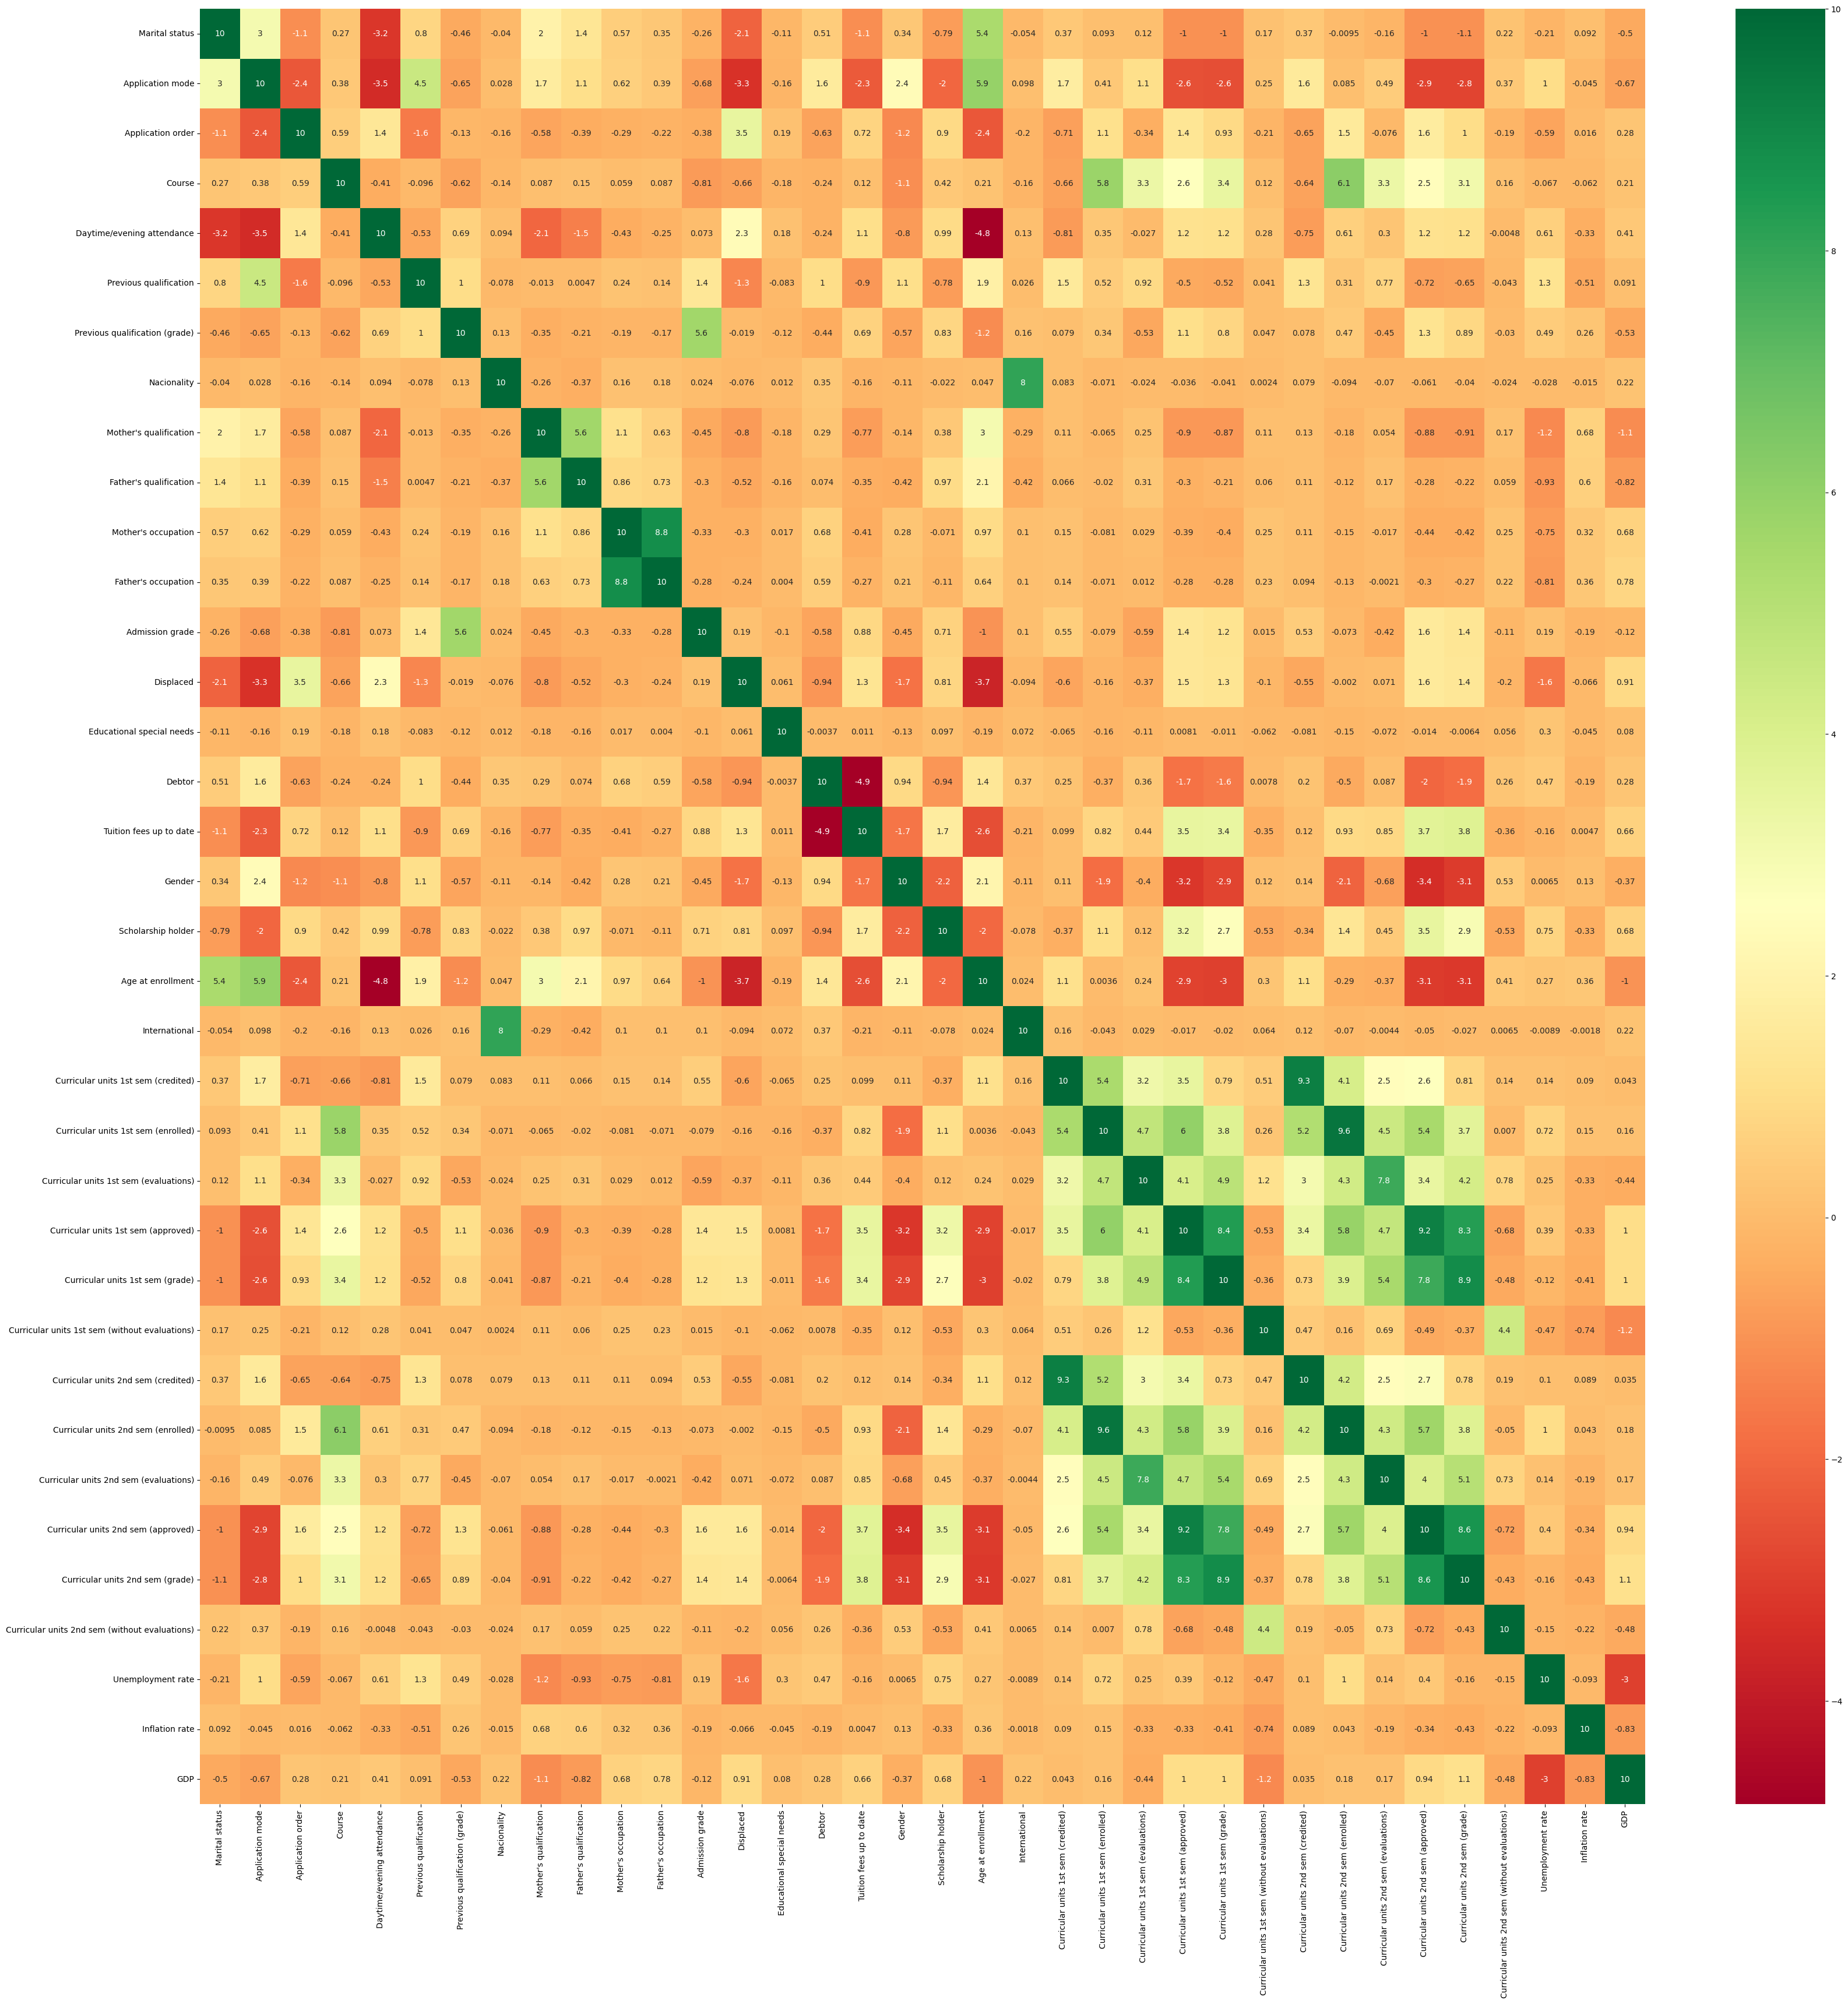

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# get correlations of each features in dataset
# use df_test to omit target variable
# drop the "id" column
corrmat = df_test.drop('id', axis=1).corr()
top_corr_features = corrmat.index

# select the features with the highest and lowest correlations.
# top_corr_features_sorted = sorted(top_corr_features, key=lambda x: abs(corrmat[x].mean()), reverse=True)
# top_5_features = top_corr_features_sorted[:5]
# bottom_5_features = top_corr_features_sorted[-5:]

plt.figure(figsize=(40,40)) # figsize=(width,height)
# plot heat map
g = sns.heatmap(df_test[top_corr_features].corr()*10,annot=True,cmap="RdYlGn")

## data preprocessing --- label encoding

#### Check how many categories are there in column "Target"

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


print(np.unique(df["Target"]))
print("This database totally covered %d categories." % len(np.unique(df["Target"])))


['Dropout' 'Enrolled' 'Graduate']
This database totally covered 3 categories.


#### Check how many samples does each categories contain

In [9]:
for i in np.unique(df["Target"]):
    # print(i)
    # %d is the placeholder for an integer
    # %s is the placeholder for a string
    # there are two placeholder inside the print statement, %d and %s.
    
    # %d corresponds to np.sum(y_train == i), 
    # where y_train == i creates a boolean array of "True" -- if the correspnding value is equal to i , and "False" otherwise
    # np.sum(y_train == i) counts the number of "True" value and return the number of samples of category i
    
    # the second %s just correspond to the category i
    
    print("There are %d samples in train data for category [%s]." % (np.sum(df["Target"] == i), str(i)))

There are 25296 samples in train data for category [Dropout].
There are 14940 samples in train data for category [Enrolled].
There are 36282 samples in train data for category [Graduate].


#### Use label encoding to transform the "Target" column 

In [10]:
# We transform the categorical labels -- ['Dropout','Enrolled','Graduate'] to numerical labels -- [0,1,2]
# because many machine learning algorithms require numeric inputs
label_encoder = LabelEncoder()
df["Target"] = label_encoder.fit_transform(df["Target"])
print(np.unique(df["Target"]))
print("This database totally covered %d categories." % len(np.unique(df["Target"])))

[0 1 2]
This database totally covered 3 categories.


#### seperate x_train and y_train and x_test and y_test

In [11]:
x_train = df.drop(columns=['Target','id'])
# x_train
y_train = df["Target"]
# y_train
x_test = df_test.drop(columns=['id'])

#### View shape of x_train and y_train

In [12]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (76518, 36)
y_train:  (76518,)


#### Check how many categories are there in x_train/ y_train

In [13]:
import numpy as np
print(np.unique(y_train))
x_train.head()
y_train.head()


[0 1 2]


0    2
1    0
2    0
3    1
4    2
Name: Target, dtype: int32

## Concept of KFold and stratifiedKFold

#### K-fold Intuition

In [14]:
# Import necessary libraries
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(x_train):
    print(train_index, test_index)

[25506 25507 25508 ... 76515 76516 76517] [    0     1     2 ... 25503 25504 25505]
[    0     1     2 ... 76515 76516 76517] [25506 25507 25508 ... 51009 51010 51011]
[    0     1     2 ... 51009 51010 51011] [51012 51013 51014 ... 76515 76516 76517]


#### get_score fuction

In [15]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

#### Stratified-kfold(shuffle=False) Intuition

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

accuracy = []
for train_index, test_index in skf.split(x_train,y_train):
    print("Train:",train_index,"Test:", test_index)
    X1_train, X1_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
    


Train: [25189 25195 25200 ... 76515 76516 76517] Test: [    0     1     2 ... 25645 25649 25650]
Train: [    0     1     2 ... 76515 76516 76517] Test: [25189 25195 25200 ... 51090 51103 51112]
Train: [    0     1     2 ... 51090 51103 51112] Test: [50878 50879 50880 ... 76515 76516 76517]


In [17]:
# we can obeserve that the splitting method is different from kfold, 
# as stratifiedKFold automatically ensures each fold maintains the same distribution as the original dataset
# This is particularly important in imbalanced dataset, where certain classes are underpresented

#### Stratified-kfold(Shuffle=True) Intuition

In [18]:
skf_shuffle = StratifiedKFold(n_splits=3,shuffle=True)
for train_index, test_index in skf_shuffle.split(x_train,y_train):
    print(train_index, test_index)
    

[    0     1     2 ... 76515 76516 76517] [    5     7     9 ... 76506 76510 76514]


[    0     4     5 ... 76511 76514 76515] [    1     2     3 ... 76513 76516 76517]
[    1     2     3 ... 76514 76516 76517] [    0     4     8 ... 76507 76511 76515]


In [19]:
# We can observe that Shuffling randomize the order of data points before splitting them into k-fold
# This randomization helps prevent any ordering bias that may exist in the original dataset.
'''    classifier.fit(X1_train, y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)'''

'    classifier.fit(X1_train, y1_train)\n    prediction = classifier.predict(X1_test)\n    score = accuracy_score(prediction,y1_test)\n    accuracy.append(score)\nprint(accuracy)'

#### log-loss Intuition

In [20]:
# True Labels: Suppose we have a dataset with 3 samples and 3 classes. The true labels (one-hot encoded) are:
y_train_log_loss = np.array([
    [1, 0, 0],  # Sample 1 belongs to class 0
    [0, 1, 0],  # Sample 2 belongs to class 1
    [0, 0, 1]   # Sample 3 belongs to class 2
])
# Predicted Probabilities: The model predicts probabilities for each class:
oof_preds = np.array([
    [0.8, 0.1, 0.1],  # Predicted probabilities for sample 1
    [0.2, 0.6, 0.2],  # Predicted probabilities for sample 2
    [0.1, 0.2, 0.7]   # Predicted probabilities for sample 3
])
# Compute Log Loss:
from sklearn.metrics import log_loss
logloss = log_loss(y_train_log_loss, oof_preds)
print("Logloss:",logloss)

Logloss: 0.3635480396729776


### intuition behind axis=0 and axis =1 in argmax function

In [21]:
import numpy as np

prediction = np.array([
    [0.1, 0.7, 0.1, 0.1],  # Sample 1 probabilities
    [0.2, 0.2, 0.5, 0.1],  # Sample 2 probabilities
    [0.6, 0.1, 0.1, 0.2]   # Sample 3 probabilities
])
predicted_classes = np.argmax(prediction, axis=0)
print("argmax by column",predicted_classes)
predicted_classes = np.argmax(prediction, axis=1)
print("argmax by row",predicted_classes)

argmax by column [2 0 1 2]
argmax by row [1 2 0]


## Cross Validation 

In [25]:
from sklearn.metrics import accuracy_score, log_loss
import datetime
from colorama import Fore, Style

skf_shuffle = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# OOF predictions are evaluated on data points that were not used for training(aka the validation set) in each fold.
# OOF predictions are used to access the model's performance on unseen data(the validation set)
oof = {}
# test predictions are predictions made by a model on the completely seperate dataset, known as the test dataset
test_pred = {}
COMPUTE_TEST_PRED = False
def cross_validate(classifier, label):
    """Compute out-of-fold and test predictions for a given model.
    
    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.
    """
    start_time = datetime.datetime.now()
    accuracy = []
    oof_preds = np.full((len(df), 3), np.nan, dtype=float)
    # we use enumerate() because we want to keep track of the current fold, 
    # otherwise the for loop will become 
    # for train_index, test_index in skf_shuffle.split(x_train, y_train):
    for fold, (train_index, test_index) in enumerate(skf_shuffle.split(x_train, y_train)):
        X1_train, X1_test = x_train.iloc[train_index], x_train.iloc[test_index]
        y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        
        classifier.fit(X1_train, y1_train)
        prediction = classifier.predict_proba(X1_test)
        score = accuracy_score(y1_test, np.argmax(prediction, axis=1))
        
        print(f"# Fold {fold}: accuracy={score:.5f}")
        accuracy.append(score)
        # use test_index here because it contains the indices of the validation set for the current fold,
        # which corresponds to the positions in the original dataset
        oof_preds[test_index] = prediction
        
        
    elapsed_time = datetime.datetime.now() - start_time
    
    accuracy = accuracy_score(y_train, np.argmax(oof_preds, axis=1))
    # This logloss value gives an indication of how well the model's predicted probabilities match the true labels, 
    # with lower values indicating better performance.
    logloss = log_loss(y_train, oof_preds)   
    
    print(f"{Fore.GREEN}# Overall: accuracy={accuracy:.5f}"
          f" logloss={logloss:.5f} {label}"
          f"   {int(np.round(elapsed_time.total_seconds() / 60))} min{Style.RESET_ALL}")
    # store the predicted out-of-fold probabilities of the specific classifier in a dictionary
    # useful for future ensembles
    oof[label] = oof_preds
    
    if COMPUTE_TEST_PRED:
        classifier.fit(x_train, y_train)
        y_pred =  classifier.predict_proba(x_test)
        test_pred[label] = y_pred

## Models

### Import all Libraries

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform, randint

## 1.logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specific parameters
logistic_model = LogisticRegression(penalty='l2', random_state=3314, solver='saga', max_iter=100, multi_class='multinomial')

# Pass the initialized model to the cross_validate function
cross_validate(logistic_model, "Logistic Regression")


KeyboardInterrupt: 

## 2.Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model with specific parameters
rf_model = RandomForestClassifier(random_state=3314)

# Pass the initialized model to the cross_validate function
cross_validate(rf_model, "Random Forest untuned")


# Fold 0: accuracy=0.82162
# Fold 1: accuracy=0.82848
# Fold 2: accuracy=0.82331
# Fold 3: accuracy=0.83016
# Fold 4: accuracy=0.82376
# Overall: accuracy=0.82547 logloss=0.52929 Random Forest untuned   1 min


### Random forest tuning normal grid search

#### Define parameter grid

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # number of trees in the forest, more trees = perform better generally = higher computational cost
    'n_estimators': [200, 300], # default 100
    
    # maximum depth of the tree, control it helps prevent overfitting
    'max_depth': [None, 30], # default None, which means nodes are expanded until all leaves are pure
    
    # minimum number of samples needed to split an internal node, 
    # smaller number leads to overfitting, higher number makes the tree more conservative, and helps generalization
    'min_samples_split': [2, 5, 10], # default 2
    
    # Number of samples neeeded to create a new leaf node
    # smaller number allows the model to capture fine details, which also leads to overfitting
    # higher number makes the tree more conservative, and helps generalization
    'min_samples_leaf': [1, 4], # default 1
    
    # number of features to consider when looking for the best split
    # 'auto': sqrt of total number of features
    # 'log2': log base 2 of total number of features
    # using fewer features can make the individual trees more diverse, increase uncorrelatedness
    'max_features': ['sqrt', 'log2']
}


#### use grid search cross validation

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=3314),
                           param_grid=param_grid,
                           cv=skf_shuffle,  # Use StratifiedKFold cross-validation
                           verbose=True,
                           n_jobs=-1,  # Use all available cores
                           scoring='accuracy',
                           return_train_score=True)
# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.5f}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.82735


## Using random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_random_search = {
    'n_estimators': [int(x) for x in range(50, 1001, 50)],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at every split
    'max_depth': [int(x) for x in range(10, 111, 10)] + [None],  # Maximum number of levels in the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}
# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=3314),
                                   param_distributions=param_grid_random_search,
                                   n_iter=10,  # Number of random parameter combinations to try
                                   cv=skf_shuffle,  # Use StratifiedKFold cross-validation
                                   verbose = True,
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',
                                   return_train_score=True)

# Perform the random search
random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {random_search.best_score_:.5f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Best Cross-Validation Accuracy: 0.82697


## Pickle Checkpoint 1

In [ ]:
# Save the dictionary to a file
with open('myData.pkl', 'wb') as file:
    pickle.dump(grid_search.best_params_, file)
    pickle.dump(random_search.best_params_, file)

In [ ]:
with open('myData.pkl', 'rb') as f2:
    grid_search.best_params_ = pickle.load(f2)
    random_search.best_params_ = pickle.load(f2)

### Baysiean Optimisation

In [ ]:
# Baysiean optimisation builds a probabilistic model of the objective function, and use it to select the most promising hyperparameters to evaluate text
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Define the parameter search space
search_space = {
    'n_estimators': Integer(300, 400),  # Specify as an integer range
    'max_features': Categorical([ 'sqrt', 'log2', None]),  # Number of features to consider at every split
    'max_depth': Categorical([None] + list(range(10, 111))),  # Include None and range 10 to 110
    'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 4),  # Minimum number of samples required to be at a leaf node
    #'bootstrap': Categorical([True, False]),  # Whether bootstrap samples are used when building trees
    #'criterion': Categorical(['gini', 'entropy']),  # Function to measure the quality of a split
    #'class_weight': Categorical([None, 'balanced', 'balanced_subsample'])  # Weights associated with classes
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3314)

# Initialize the BayesSearchCV object
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=3314),
    search_spaces=search_space,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=skf_shuffle,  # Use StratifiedKFold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='accuracy',
    return_train_score=True,
    random_state=3314,
    verbose=True
)

# Perform the search
bayes_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {bayes_search.best_score_:.5f}')

# Fitting 5 folds for each of 1 candidates, totalling 5 fits
# This is normal for Bayesian Optimisation, as it evaluates one data point at a time, and it chooses another data point base on the results

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: OrderedDict([('max_depth', 97), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 6), ('n_estimators', 399)])
Best Cross-Validation Accuracy: 0.82699


## 3.ExtraTrees (Extremely Random Trees)

In [ ]:
# Extra trees and randomforest are both ensembling learning method base on decision trees
# They differ in the way of introducing randomness to improve model robustness and reduce overfitting



In [ ]:
from scipy.stats import uniform, randint

param_space_et = {
    'min_samples_leaf': randint(1, 6),  # Range from 1 to 5 for min_samples_leaf
    # uniform(lower bound, scale(width))
    'max_features': uniform(0.2, 0.8),  # percentage of total features
    'min_impurity_decrease': uniform(1e-5, 1e-2),  # Range from 1e-5 to 1e-2 for min_impurity_decrease
    'n_estimators': randint(50, 201),  # Range from 50 to 200 for n_estimators
    'criterion': ['gini', 'entropy']  # Example values for criterion 
}



In [ ]:
# Initialize the RandomizedSearchCV object
random_search_et = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=3314),
                                   param_distributions=param_space_et,
                                   n_iter=15,  # Number of random parameter combinations to try
                                   cv=skf_shuffle,  # Use StratifiedKFold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',
                                   return_train_score=True,
                                   verbose=3)

# Perform the random search
random_search_et.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {random_search_et.best_params_}')
print(f'Best Cross-Validation Accuracy: {random_search_et.best_score_:.5f}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'criterion': 'entropy', 'max_features': 0.22424506707472897, 'min_impurity_decrease': 0.0022039210290136337, 'min_samples_leaf': 4, 'n_estimators': 91}
Best Cross-Validation Accuracy: 0.82697


## Pickle Checkpoint 2

In [ ]:
# Save the dictionary to a file
with open('myData.pkl', 'wb') as file:
    pickle.dump(grid_search.best_params_, file)
    pickle.dump(random_search.best_params_, file)
    pickle.dump(bayes_search.best_params_, file)
    pickle.dump(random_search_et.best_params_, file)

In [ ]:
with open('myData.pkl', 'rb') as f2:
    grid_search.best_params_ = pickle.load(f2)
    random_search.best_params_ = pickle.load(f2)
    bayes_search.best_params_ = pickle.load(f2)
    random_search_et.best_params_= pickle.load(f2)

## XGBoost (Extreme Gradient Boosting)

#### XGBoost untuned

In [75]:
import xgboost as xgb
model = xgb.XGBClassifier(enable_categorical=True)
classifier= xgb.XGBClassifier()
cross_validate(model, "XGBoost untuned")

# Fold 0: accuracy=0.82541
# Fold 1: accuracy=0.83808
# Fold 2: accuracy=0.82475
# Fold 3: accuracy=0.83304
# Fold 4: accuracy=0.82925
# Overall: accuracy=0.83011 logloss=0.43931 XGBoost untuned   0 min


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



In [112]:
xgb_params = {'grow_policy': 'depthwise', 
              'learning_rate': 0.06150883051411711, 
              'n_estimators': 822, 
              'max_depth': 5, 
              'reg_lambda': 12.695544291635334, 
              'min_child_weight': 25.289808052903343, 
              'subsample': 0.9831949009517902, 
              'colsample_bytree': 0.2687930272243655, 
              'tree_method': 'hist', 
              'enable_categorical': True, 
              'gamma': 0
}
xgb_params_0_836 = {'eta': 0.08134390364547225,
 'n_estimators': 719,
 'max_depth': 4,
 'min_child_weight': 40.12797557505445,
 'subsample': 1,
 'colsample_bytree': 0.2918581243976152,
 'lambda': 0.0003289037723514277,
 'alpha': 0.0001767392588322691,
 'grow_policy': 'lossguide'}

##### XGBoost Tuned with Optuna

####  Define the objective Function (with param grid)

In [107]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

def normalize_predictions(predictions):
    return predictions / np.sum(predictions, axis=1, keepdims=True)


def objective(trial):


    # Define param_grid_xgb

    param =  { # dictionary containing hyper-params for configuring the behavior of the 'XGBClassifier' instance
        # trial.suggest(name , list of possible values)
        "verbosity": 2,
        'learning_rate':trial.suggest_float('eta',0.01,0.3),
        'n_estimators': 1000,
        'max_depth':trial.suggest_int('max_depth',2,10),
        # minimum sum of instances weights (Hessian) needed in a child
        'min_child_weight':trial.suggest_float('min_child_weight',2,50),

        # 'max_delta_step': trial.suggest_int ('max_delta_step',1,10) # used when the class is extremely imbalanced
        
        # subsample (0,1]:  Fraction of samples used for training each tree
        # 0.5 means xgboost will randomly sample half of the trainnig data prior to growing trees, thus prevent overfitting, happen once in every iteration
        'subsample': trial.suggest_int('subsample', 0.5,1),

        # 'sampling method': trial.suggest_categorical('sampling method',['uniform','gradient based']
        # default = uniform: each training instance has equal opportunity of being selected, use 'subsample' >=0.5 for good results
        
        # colsample_bytree: Fraction of features used for training each tree.
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.2, 1.0),
        
        # lambda: Regularization parameter (L2 peanalty) for weights
        # USE LOGARITHMIC SAMPLING ENSURES THAT THE SEARCH PROCESS IS MORE SENSITIVE TO SMALL CHANGE IN THESE PARAMETERS
        "lambda": trial.suggest_float("lambda", 1e-8, 100, log=True),

        # alpha: Regularization parameter (L1 penalty) for weights
        "alpha": trial.suggest_float("alpha", 1e-8, 100, log=True),

        # "hist" :Faster histogram optimized approximate greedy algorithm
        'tree_method': 'hist',

        # 'depthwise': grow tree by split the node closest to the node first, so as to create a more balanced tree
        # 'lossguide': grow tree by splitting nodes wit hthe highest loss change first, max information gain, higher accuracy
        'grow_policy': trial.suggest_categorical('grow_policy',['depthwise', 'lossguide']),
        # prune tree only if gain < gamma
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'enable_categorical': True
        }


    

    # Train_test split
    X_train_optuna, X_valid_optuna, y_train_optuna, y_valid_optuna = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Initialize the XGBClassifier with the current set of parameters
    model = xgb.XGBClassifier(**param) # (**) in Python is used for unpacking a dictionary (xgb_params) into keyword arguments,which are then passed to the XGBClassifier constructor.

    # Train the model
    model.fit(X_train_optuna, y_train_optuna)

    #Predict on the validation set
    y_pred = model.predict_proba(X_valid_optuna)
    
    # Normalize predicted probabilities
    y_pred = normalize_predictions(y_pred)
    
    accuracy = accuracy_score(y_valid_optuna, np.argmax(y_pred, axis=1))
    # Return the metric that you want to optimize (e.g., accuracy)
    return accuracy

    
 

# Create a study object and optimized the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# Print the best parameters found
best_params = study.best_params
print("Best params:", best_params)

[I 2024-06-30 18:57:13,201] A new study created in memory with name: no-name-895d62a0-670b-4293-b98b-34f165b5c4bb
[I 2024-06-30 18:57:16,857] Trial 0 finished with value: 0.3285415577626764 and parameters: {'eta': 0.15677858741712725, 'max_depth': 2, 'min_child_weight': 29.38865249783874, 'subsample': 0, 'colsample_bytree': 0.7077594904764444, 'lambda': 1.9833711137023317e-08, 'alpha': 53.54884308035086, 'grow_policy': 'lossguide', 'gamma': 0.19342116324190492}. Best is trial 0 with value: 0.3285415577626764.
[I 2024-06-30 18:57:20,531] Trial 1 finished with value: 0.8299790904338735 and parameters: {'eta': 0.12757114355296245, 'max_depth': 5, 'min_child_weight': 2.376819688889144, 'subsample': 1, 'colsample_bytree': 0.3958109518860045, 'lambda': 4.911319619038633e-07, 'alpha': 72.98015126488062, 'grow_policy': 'depthwise', 'gamma': 0.06792582064717337}. Best is trial 1 with value: 0.8299790904338735.
[I 2024-06-30 18:57:24,090] Trial 2 finished with value: 0.3285415577626764 and param

Best params: {'eta': 0.15907220730388086, 'max_depth': 3, 'min_child_weight': 29.563285155380804, 'subsample': 1, 'colsample_bytree': 0.2590610447349618, 'lambda': 0.013830021619440492, 'alpha': 1.4962657625902125, 'grow_policy': 'lossguide', 'gamma': 0.08094041927428612}


## Pickle Checkpoint 3

In [106]:
# Save the dictionary to a file
with open('myData.pkl', 'wb') as file:
    #pickle.dump(grid_search.best_params_, file)
    #pickle.dump(random_search.best_params_, file)
    #pickle.dump(bayes_search.best_params_, file)
    #pickle.dump(random_search_et.best_params_, file)
    pickle.dump(xgb_params_1, file)
    pickle.dump(xgb_params_2, file)

In [64]:
with open('myData.pkl', 'rb') as f2:
    #grid_search.best_params_ = pickle.load(f2)
    #random_search.best_params_ = pickle.load(f2)
    #bayes_search.best_params_ = pickle.load(f2)
    #random_search_et.best_params_= pickle.load(f2)
    xgb_params_1 = pickle.load(f2)
    xgb_params_2 = pickle.load(f2)

#### Show best_params for xgboost

In [113]:
xgb_params_2 =study.best_params
xgb_params_0_836


{'eta': 0.08134390364547225,
 'n_estimators': 719,
 'max_depth': 4,
 'min_child_weight': 40.12797557505445,
 'subsample': 1,
 'colsample_bytree': 0.2918581243976152,
 'lambda': 0.0003289037723514277,
 'alpha': 0.0001767392588322691,
 'grow_policy': 'lossguide'}

### Visualize XGBoost results

In [109]:
import plotly
import matplotlib.pyplot as plt
optuna.visualization.plot_optimization_history(study)

#### Run XGBoost with hyperparameters tuned by optuna

In [114]:
model_xgboost = xgb.XGBClassifier(**xgb_params_0_836)
cross_validate(model_xgboost, "XGBoost tuned 1")



# Fold 0: accuracy=0.82861
# Fold 1: accuracy=0.83828
# Fold 2: accuracy=0.83200
# Fold 3: accuracy=0.83683
# Fold 4: accuracy=0.83160
# Overall: accuracy=0.83346 logloss=0.43001 XGBoost tuned 1   0 min


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



### Extract Feature Importance

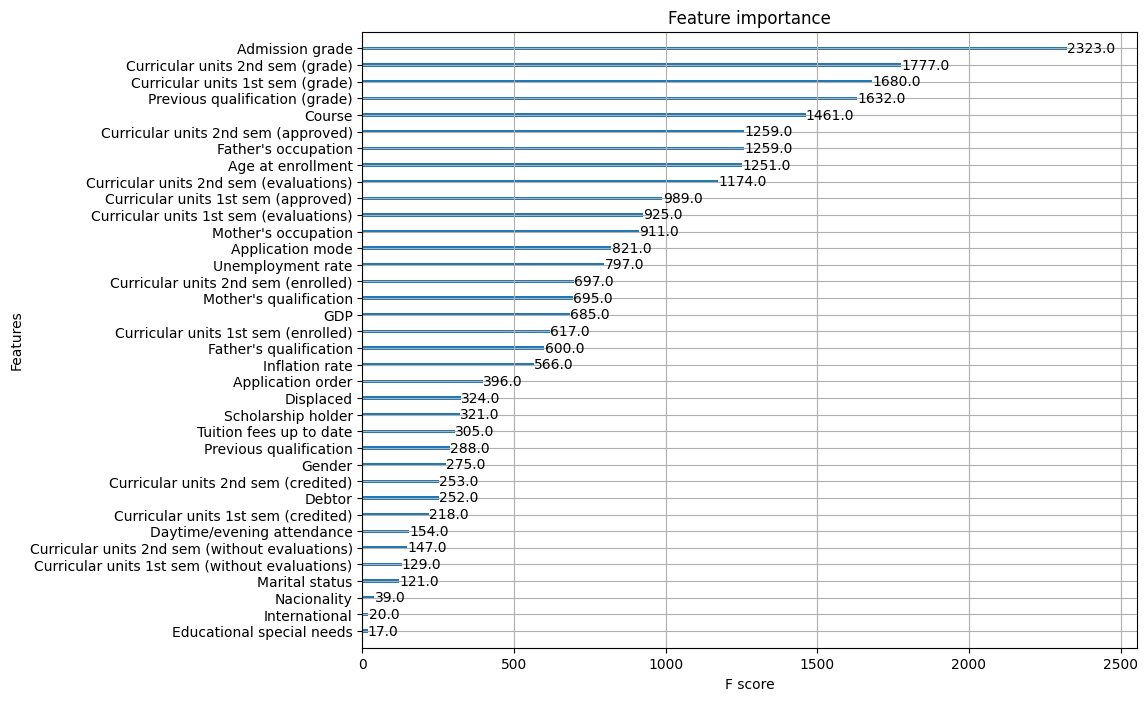

In [115]:
from xgboost import plot_importance 
# Extract feature importance
importance = model_xgboost.feature_importances_

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model_xgboost,ax = ax)
plt.show()



## LightGBM untuned

In [117]:
import lightgbm
model_lightgbm = lightgbm.LGBMClassifier(verbose=-1)
cross_validate(model_lightgbm, 'LightGBM untuned')

# Fold 0: accuracy=0.82527
# Fold 1: accuracy=0.83462
# Fold 2: accuracy=0.82782
# Fold 3: accuracy=0.83513
# Fold 4: accuracy=0.83199
# Overall: accuracy=0.83097 logloss=0.43716 LightGBM untuned   0 min


#### Run LightGBM with hyperparameters tuned by optuna

### Submission 

In [118]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming label_encoder is already fitted and pred contains your numerical predictions

# Step 1: Perform Cross-Validation and Prediction
COMPUTE_TEST_PRED = True
cross_validate(model_xgboost, "XGBoost tuned 1")
COMPUTE_TEST_PRED = False


# Fold 0: accuracy=0.82861
# Fold 1: accuracy=0.83828
# Fold 2: accuracy=0.83200
# Fold 3: accuracy=0.83683
# Fold 4: accuracy=0.83160
# Overall: accuracy=0.83346 logloss=0.43001 XGBoost tuned 1   0 min


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



In [119]:

# Step 2: Check if predictions are available
if 'XGBoost tuned 1' in test_pred:
    y_pred = test_pred['XGBoost tuned 1']  # Example: Replace with your actual prediction retrieval logic
print (y_pred)
y_pred = np.argmax(y_pred, axis=1)

pred_categorical = label_encoder.inverse_transform(y_pred)
# print (pred_categorical)
df_sample_submission_copy = df_sample_submission.copy()
df_sample_submission_copy['Target'] = pred_categorical
print(df_sample_submission_copy)

[[0.9938554  0.00169968 0.00444492]
 [0.00372784 0.01373497 0.9825372 ]
 [0.03317381 0.25213698 0.71468925]
 ...
 [0.981433   0.01101986 0.00754713]
 [0.8675892  0.12126818 0.01114266]
 [0.9870797  0.00639905 0.0065213 ]]
           id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]


### Save the DataFrame to CSV

In [120]:
df_sample_submission_copy.to_csv('submission_2.csv', index=False)
